# Percentage stacked distribution bar plots of Developmental Hb dataset
Author: Juliska E Boer

Date: 03 Nov 2020

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

#settings
sc.settings.verbosity = 3             # show: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.figdir = "E:/figures/embryoHb/"
sc.settings.set_figure_params(dpi=80)

C:\Users\Juliska\Anaconda3\envs\UMCU\lib\site-packages\anndata\_core\anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [2]:
adata = sc.read_h5ad("../../data/output/embryo_Hb/Mar2020_embryo_Hb_Pou4f1_louvain_seurat.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 2773 × 2292 
    obs: 'n_genes', 'plate', 'platebatch', 'stage', 'well_no', 'ERCC_genes', 'n_total_counts', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_protein_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'n_counts_norm', 'louvain', 'velocity_self_transition', 'lineages', 'root_cells', 'end_points', 'velocity_pseudotime', '__is_in_cluster__', 'trajectory_wishbone', 'branch_wishbone', 'dpt_pseudotime', 'distance'
    var: 'ENS_names', 'geneid', 'feature', 'chr', 'fullname', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'branch1_wishbone', 'branch2_wishbone', 'dendrogram_louvain', 'dendrogram_stage', 'diffmap_evals', 'draw_graph', 'iroot', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 

#### First plot:
Stacked percentage bar plot showing sampling time point distribution for each Louvain cluster

In [4]:
#calculate percentages of sampling time points for each Louvain cluster
df = pd.DataFrame()
for x in range(0, len(set(adata.obs["louvain"]))):
    temp = adata[adata.obs["louvain"] == str(x)]
    e11 = temp[temp.obs["stage"] == "E11"].shape[0]
    e12 = temp[temp.obs["stage"] == "E12"].shape[0]
    e13 = temp[temp.obs["stage"] == "E13"].shape[0]
    e15 = temp[temp.obs["stage"] == "E15"].shape[0]
    e18 = temp[temp.obs["stage"] == "E18"].shape[0]
    p4 = temp[temp.obs["stage"] == "P4"].shape[0]
    p7 = temp[temp.obs["stage"] == "P7"].shape[0]
    adult = temp[temp.obs["stage"] == "adult"].shape[0]
    all_tp = e11+e12+e13+e15+e18+p4+p7+adult
    perc_e11 = (e11/(all_tp))*100
    perc_e12 = (e12/(all_tp))*100
    perc_e13 = (e13/(all_tp))*100
    perc_e15 = (e15/(all_tp))*100
    perc_e18 = (e18/(all_tp))*100
    perc_p4 = (p4/(all_tp))*100
    perc_p7 = (p7/(all_tp))*100
    perc_adult = (adult/(all_tp))*100
    df[str(x)] = [perc_e11, perc_e12, perc_e13, perc_e15, perc_e18, perc_p4, perc_p7, perc_adult]

df.index = ["e11", "e12", "e13", "e15", "e18", "p4", "p7", "adult"]
df.columns = ['early Hb1[0]', 'early Hb2[1]','vMHb1[2]', 'vMHb2[3]', 'early dMHb[4]', 'dMHb2[5]','iHb1[6]', 'dMHb3[7]', 
              'iHb2[8]', 'vMHb3[9]', 'dMHb1[10]', 'LHb[11]', 'PC2[12]', 'PC1[13]']

In [5]:
#rename columns to annotated clusternames
df = df[['PC1[13]', 'PC2[12]', 'early Hb1[0]', 'early Hb2[1]', 'early dMHb[4]', 'iHb1[6]', 'iHb2[8]', 'dMHb1[10]', 
            'dMHb2[5]', 'dMHb3[7]', 'vMHb1[2]', 'vMHb2[3]', 'vMHb3[9]', 'LHb[11]']]

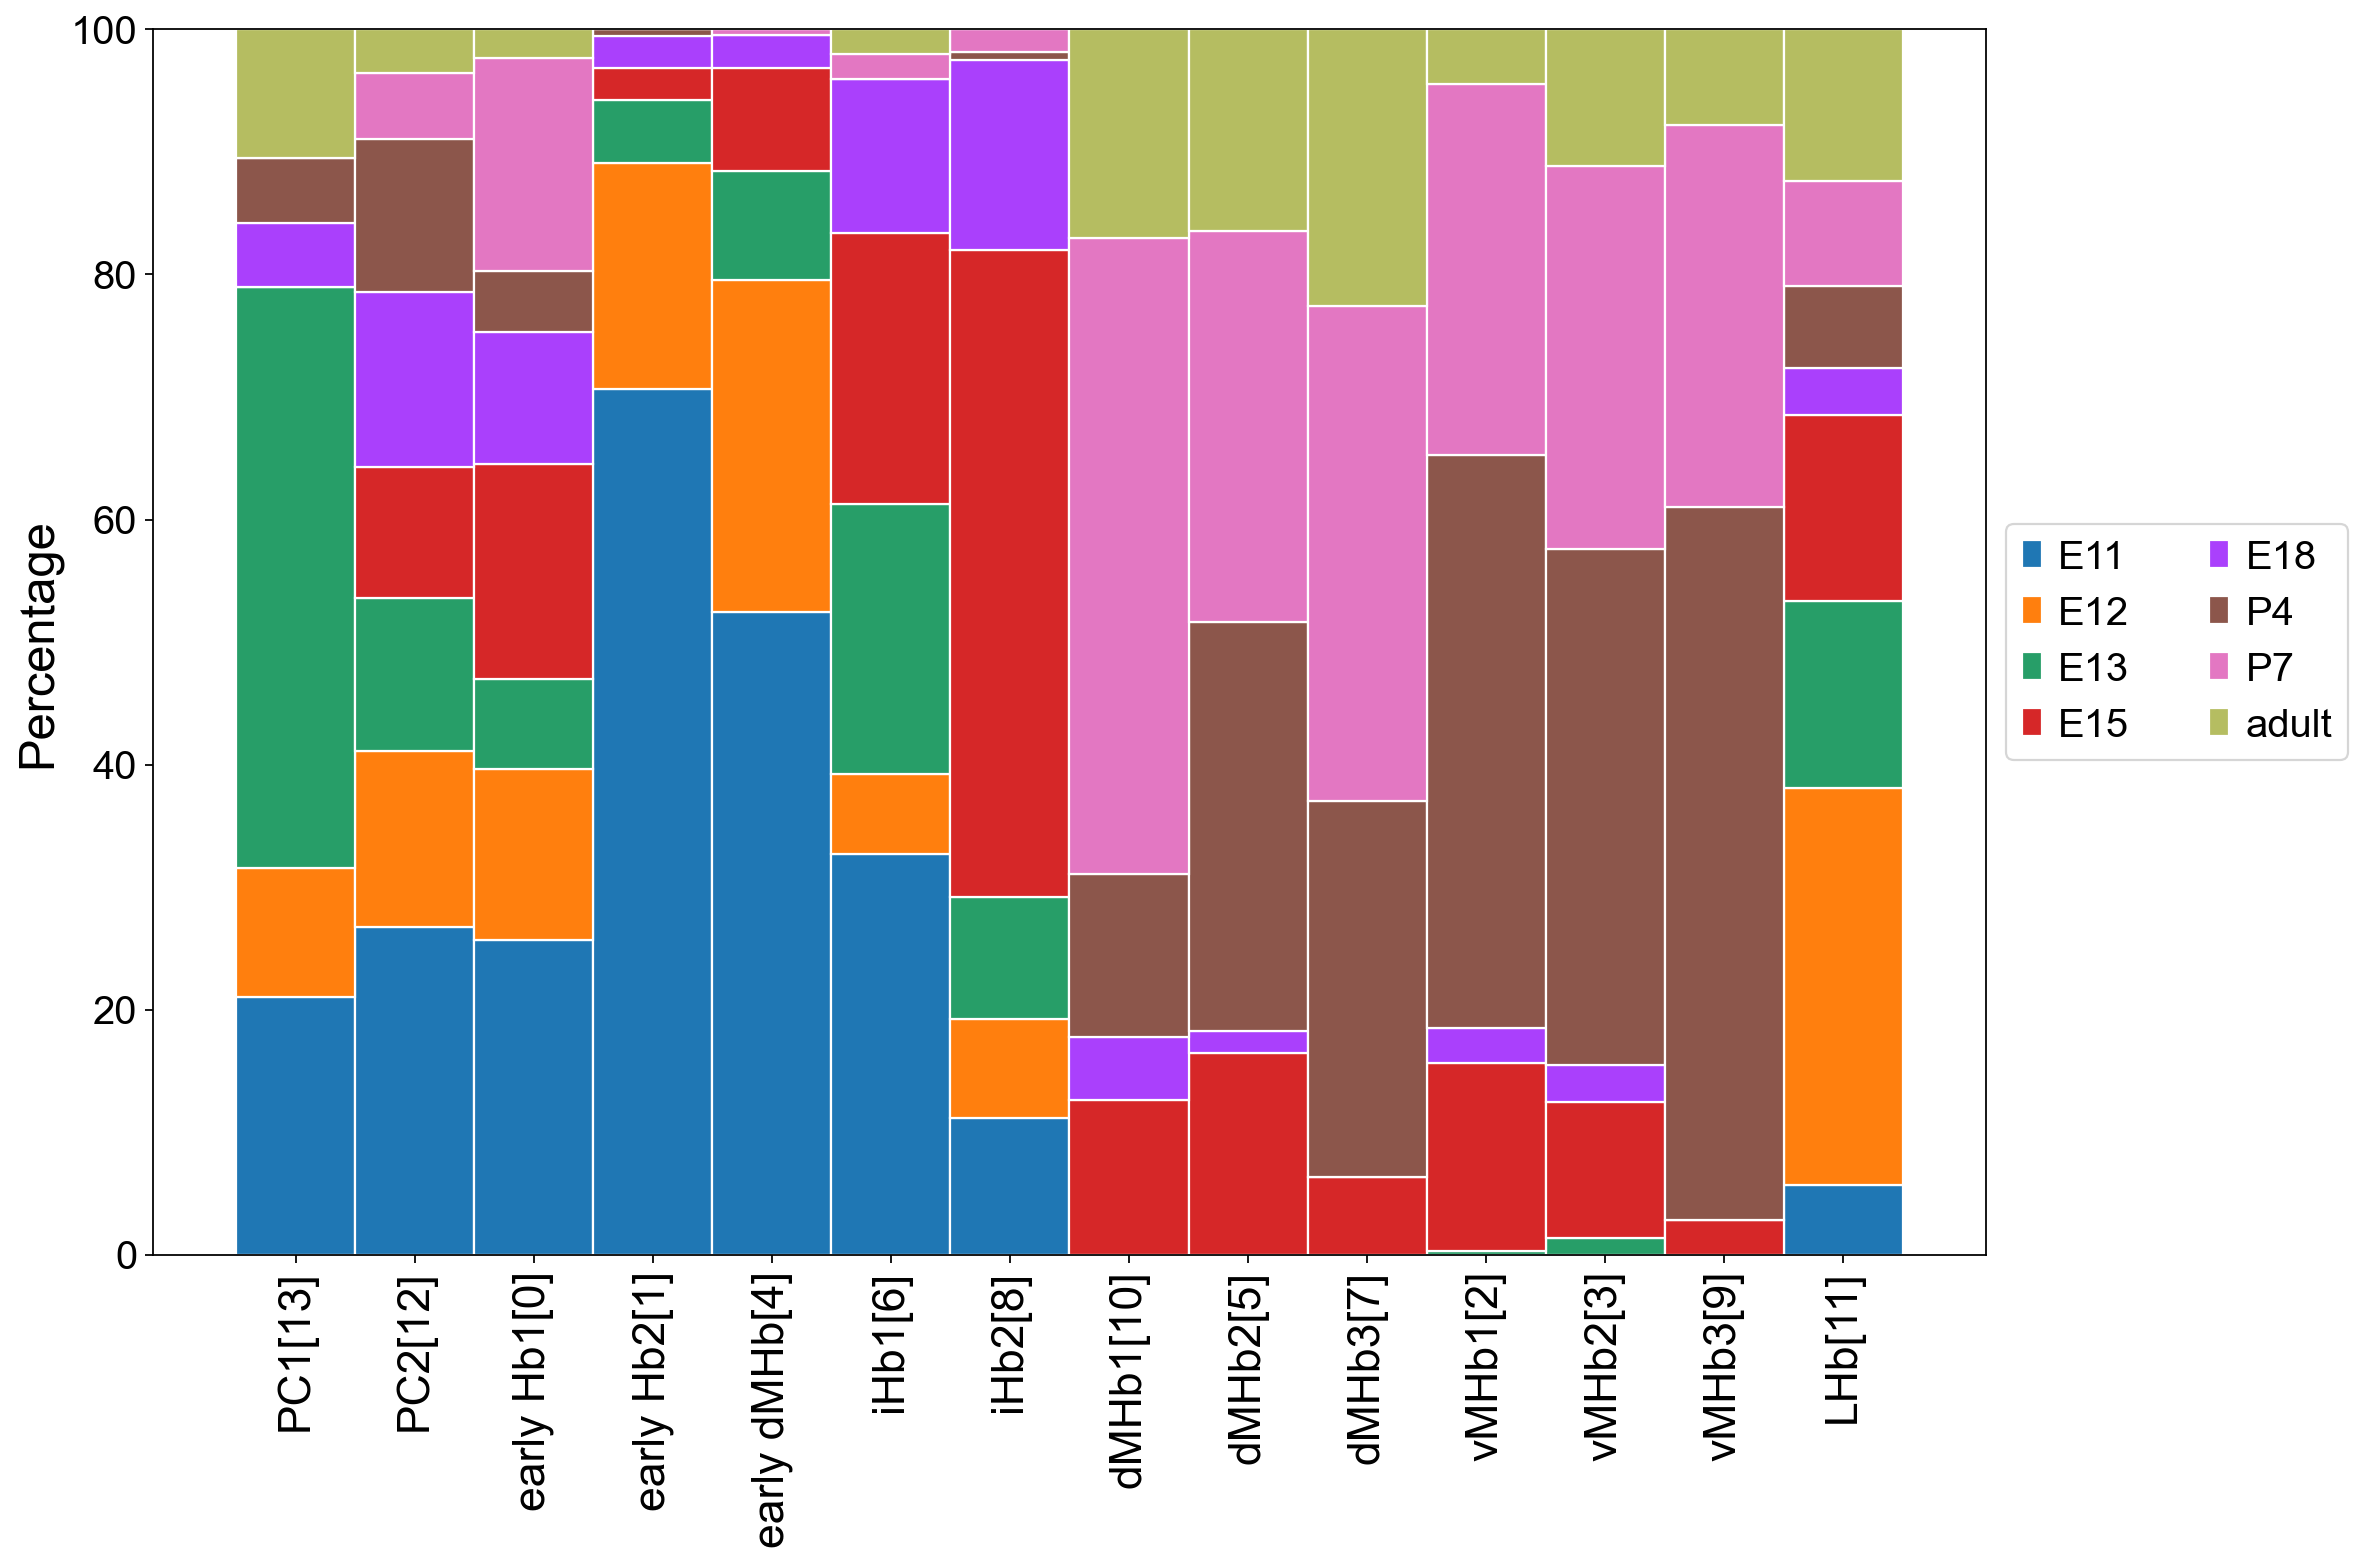

In [6]:
#create stacked percentage bar plot with matplotlib
plt.figure(figsize=(15, 10))
een = plt.bar(df.columns, df.loc["e11"], edgecolor="white", width=1)
twee = plt.bar(df.columns, df.loc["e12"], bottom=df.loc["e11"], edgecolor="white", width=1)
drie = plt.bar(df.columns, df.loc["e13"], bottom=[i+j for i,j in zip(df.loc["e11"], df.loc["e12"])], edgecolor="white", width=1)
vier = plt.bar(df.columns, df.loc["e15"], bottom=[i+j+k for i,j,k in zip(df.loc["e11"], df.loc["e12"], df.loc["e13"])], 
               edgecolor="white", width=1)
vijf = plt.bar(df.columns, df.loc["e18"], bottom=[i+j+k+l for i,j,k,l in zip(df.loc["e11"], df.loc["e12"], df.loc["e13"], 
                                                                            df.loc["e15"])], edgecolor="white", width=1)
zes = plt.bar(df.columns, df.loc["p4"], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df.loc["e11"], df.loc["e12"], df.loc["e13"], 
                                                                            df.loc["e15"], df.loc["e18"])], edgecolor="white", 
              width=1)
zeven = plt.bar(df.columns, df.loc["p7"], bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(df.loc["e11"], df.loc["e12"], df.loc["e13"], 
                                                                            df.loc["e15"], df.loc["e18"], df.loc["p4"])], 
                edgecolor="white", width=1)
acht = plt.bar(df.columns, df.loc["adult"], bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(df.loc["e11"], df.loc["e12"], df.loc["e13"], 
                                                                            df.loc["e15"], df.loc["e18"], df.loc["p4"], df.loc["p7"])], 
                edgecolor="white", width=1)
plt.legend((een[0], twee[0], drie[0], vier[0], vijf[0], zes[0], zeven[0], acht[0]), 
           ("E11", "E12", "E13", "E15", "E18", "P4", "P7", "adult"), loc="center left", fontsize=18,ncol=2, bbox_to_anchor=(1,0.5))
plt.xticks(rotation=90, size=20)
plt.yticks(size=18)
plt.ylabel("Percentage", size=22)
plt.grid(False)
plt.tight_layout()
plt.savefig("../../figures/embryo_Hb/DevHb_timepoint_occupancy_cl.pdf")
plt.show()

#### Second plot:
Stacked percentage bar plot showing Louvain cluster distribution for each sampling time point

In [7]:
#calculate percentages of Louvain clusters for each sampling time point
df = pd.DataFrame()
for x in set(adata.obs["stage"]):
    temp = adata[adata.obs["stage"] == str(x)]
    s0 = temp[temp.obs["louvain"] == "0"].shape[0]
    s1 = temp[temp.obs["louvain"] == "1"].shape[0]
    s2 = temp[temp.obs["louvain"] == "2"].shape[0]
    s3 = temp[temp.obs["louvain"] == "3"].shape[0]
    s4 = temp[temp.obs["louvain"] == "4"].shape[0]
    s5 = temp[temp.obs["louvain"] == "5"].shape[0]
    s6 = temp[temp.obs["louvain"] == "6"].shape[0]
    s7 = temp[temp.obs["louvain"] == "7"].shape[0]
    s8 = temp[temp.obs["louvain"] == "8"].shape[0]
    s9 = temp[temp.obs["louvain"] == "9"].shape[0]
    s10 = temp[temp.obs["louvain"] == "10"].shape[0]
    s11 = temp[temp.obs["louvain"] == "11"].shape[0]
    s12 = temp[temp.obs["louvain"] == "12"].shape[0]
    s13 = temp[temp.obs["louvain"] == "13"].shape[0]
    
    
    all_tp = s0+s1+s2+s3+s4+s5+s6+s7+s8+s9+s10+s11+s12+s13
    perc_13 = (s13/(all_tp))*100
    perc_12 = (s12/(all_tp))*100
    perc_0 = (s0/(all_tp))*100
    perc_1 = (s1/(all_tp))*100
    perc_4 = (s4/(all_tp))*100
    perc_6 = (s6/(all_tp))*100
    perc_8 = (s8/(all_tp))*100
    perc_10 = (s10/(all_tp))*100
    perc_5 = (s5/(all_tp))*100
    perc_7 = (s7/(all_tp))*100
    perc_2 = (s2/(all_tp))*100
    perc_3 = (s3/(all_tp))*100
    perc_9 = (s9/(all_tp))*100
    perc_11 = (s11/(all_tp))*100
    df[str(x)] = [perc_13,perc_12,perc_0,perc_1,perc_4,perc_6,perc_8,perc_10,perc_5,perc_7,perc_2,perc_3,perc_9,perc_11]

#correct names
df.index = ['PC1[13]', 'PC2[12]', 'early Hb1[0]', 'early Hb2[1]', 'early dMHb[4]', 'iHb1[6]', 'iHb2[8]', 'dMHb1[10]', 
            'dMHb2[5]', 'dMHb3[7]', 'vMHb1[2]', 'vMHb2[3]', 'vMHb3[9]', 'LHb[11]']
df = df[['E11', 'E12', 'E13', 'E15', 'E18', 'P4', 'P7', 'adult']]

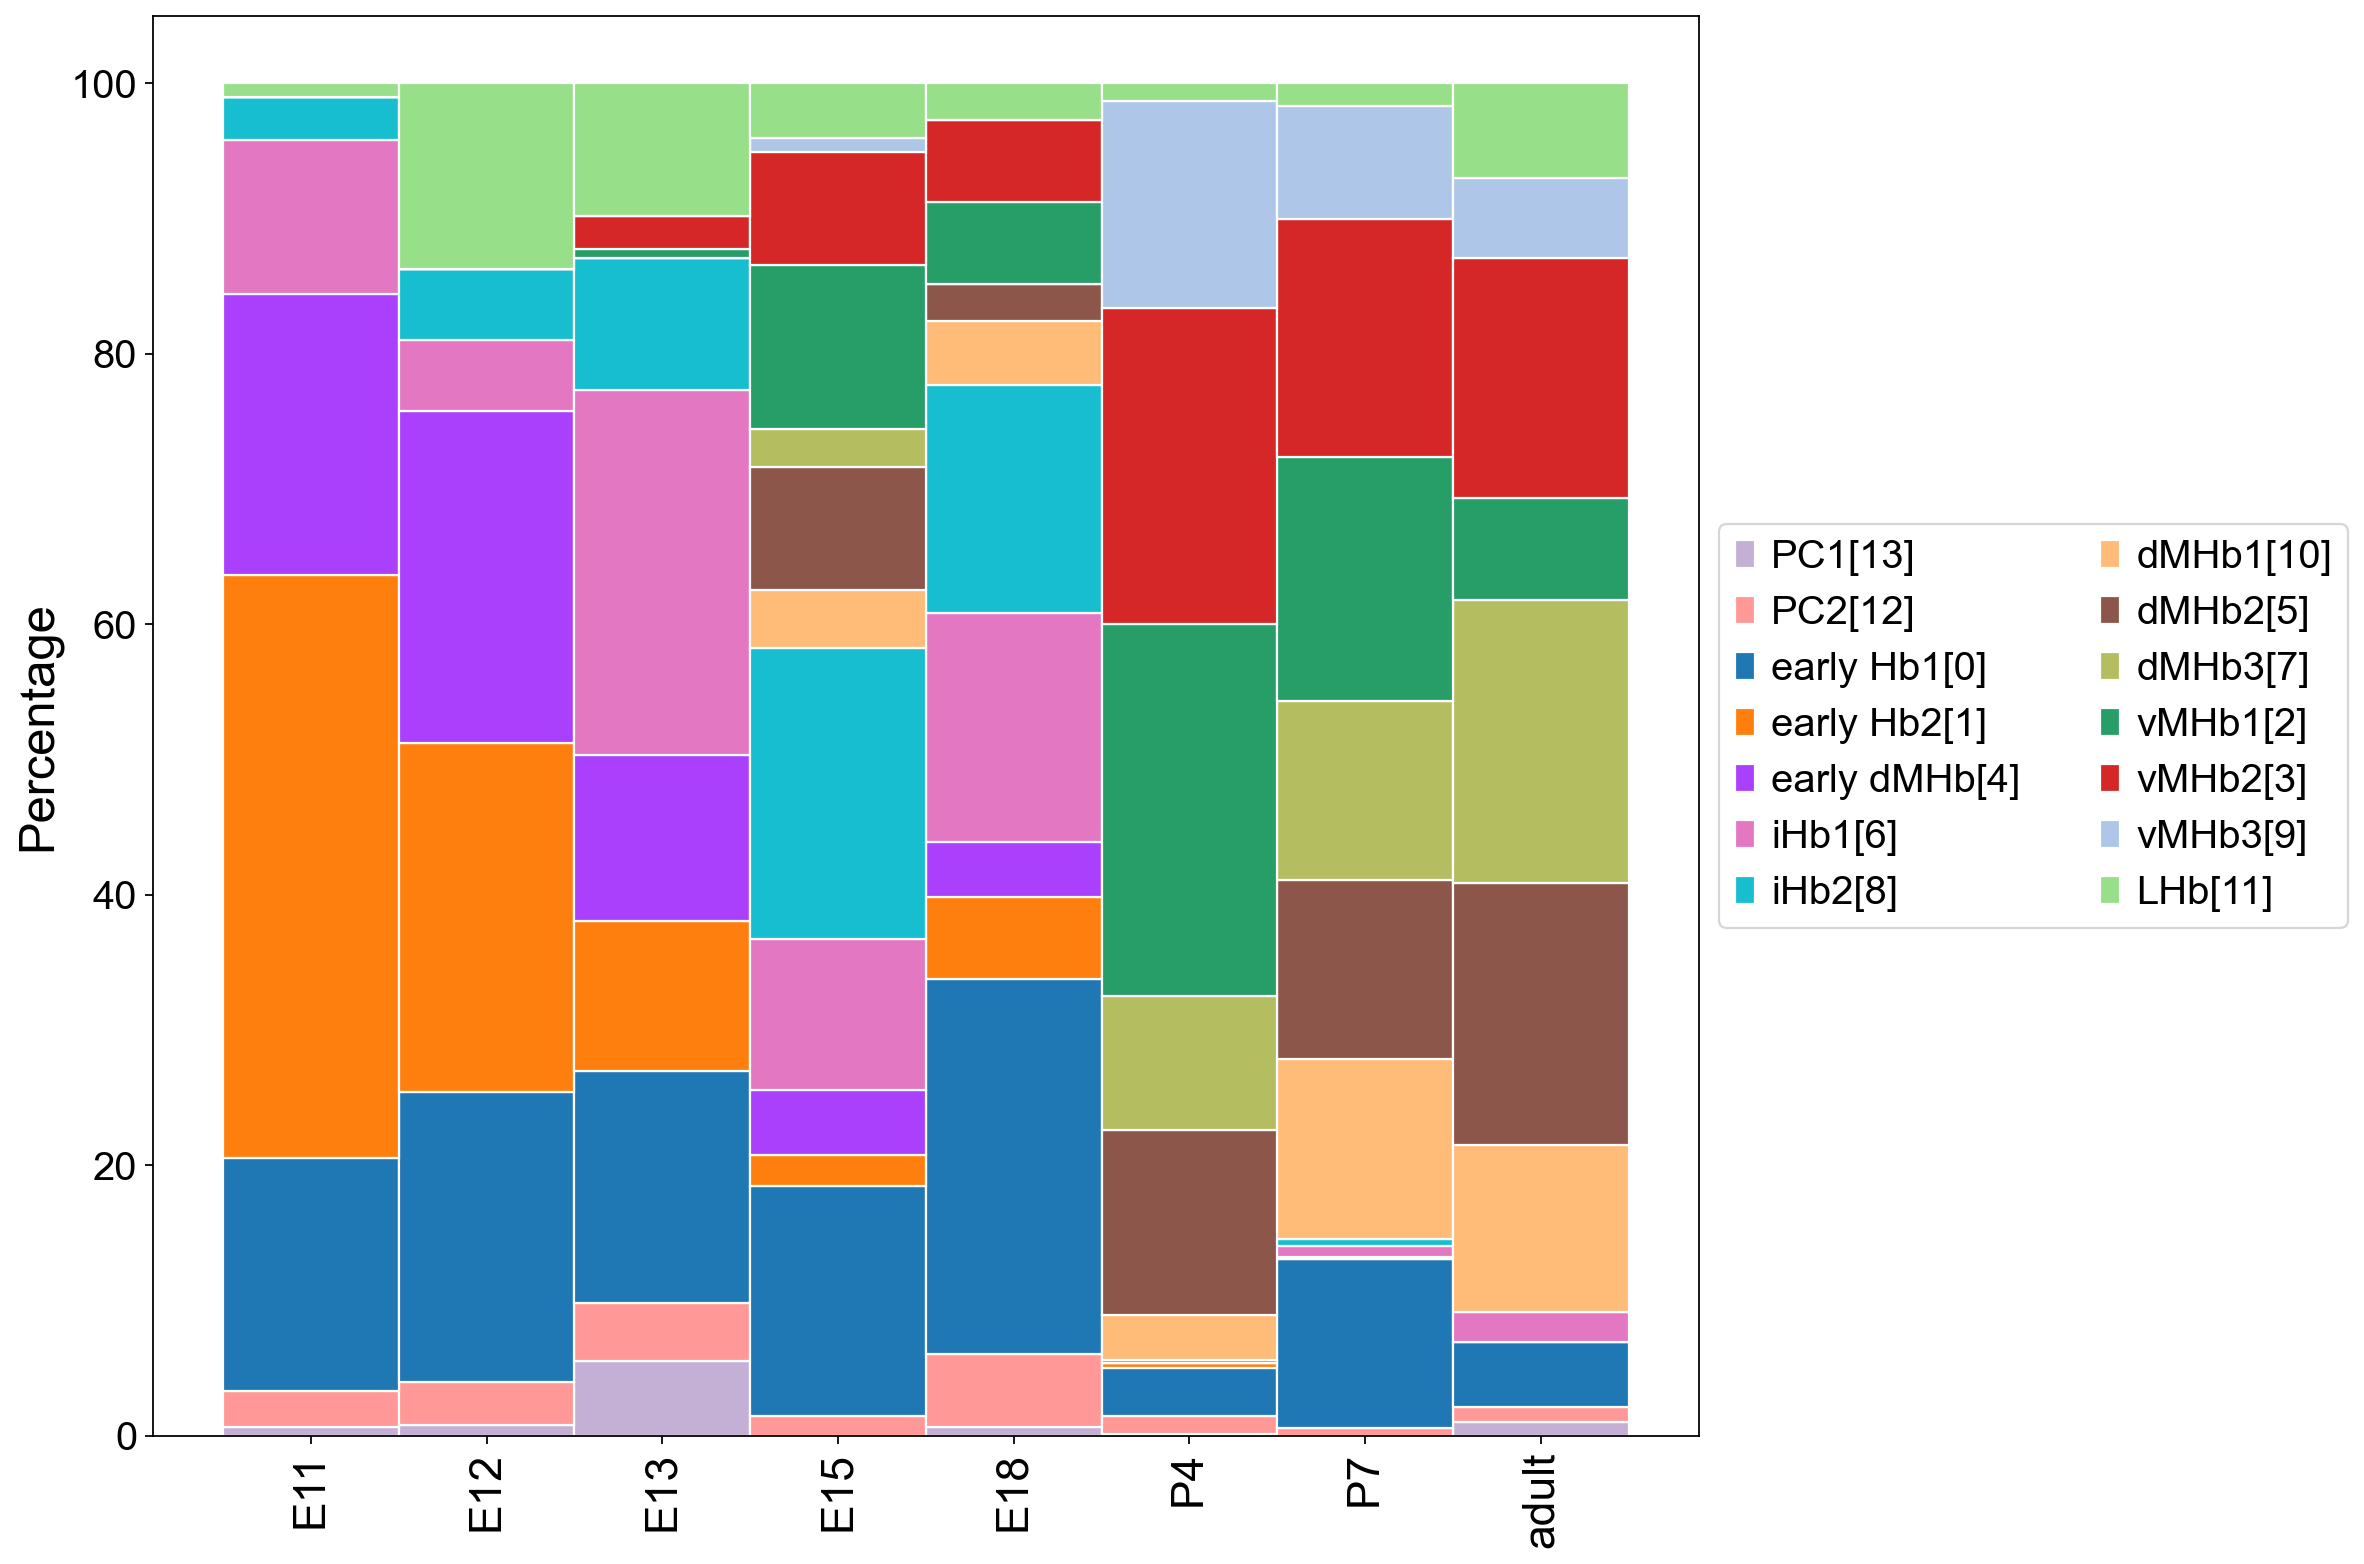

In [8]:
#create stacked percentage bar plot with matplotlib
plt.figure(figsize=(15, 10))
een = plt.bar(df.columns, df.loc["PC1[13]"], edgecolor="white", width=1, color="#c5b0d5")
twee = plt.bar(df.columns, df.loc["PC2[12]"], bottom=df.loc["PC1[13]"], edgecolor="white", width=1, color='#ff9896')
drie = plt.bar(df.columns, df.loc["early Hb1[0]"], bottom=[i+j for i,j in zip(df.loc["PC1[13]"], df.loc["PC2[12]"])], 
               edgecolor="white", width=1, color='#1f77b4')
vier = plt.bar(df.columns, df.loc["early Hb2[1]"], bottom=[i+j+k for i,j,k in zip(df.loc["PC1[13]"], df.loc["PC2[12]"], 
                                                                                  df.loc["early Hb1[0]"])], 
               edgecolor="white", width=1, color='#ff7f0e')
vijf = plt.bar(df.columns, df.loc["early dMHb[4]"], bottom=[i+j+k+l for i,j,k,l in zip(df.loc["PC1[13]"], df.loc["PC2[12]"], 
                                                                                       df.loc["early Hb1[0]"], 
                                                                                       df.loc["early Hb2[1]"])], 
               edgecolor="white", width=1, color='#aa40fc')
zes = plt.bar(df.columns, df.loc["iHb1[6]"], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df.loc["PC1[13]"], df.loc["PC2[12]"], 
                                                                                    df.loc["early Hb1[0]"], 
                                                                                    df.loc["early Hb2[1]"], 
                                                                                    df.loc["early dMHb[4]"])], 
              edgecolor="white", width=1, color='#e377c2')
zeven = plt.bar(df.columns, df.loc["iHb2[8]"], bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(df.loc["PC1[13]"], df.loc["PC2[12]"], 
                                                                                    df.loc["early Hb1[0]"], 
                                                                                    df.loc["early Hb2[1]"], 
                                                                                    df.loc["early dMHb[4]"], df.loc["iHb1[6]"])], 
                edgecolor="white", width=1, color='#17becf')
acht = plt.bar(df.columns, df.loc["dMHb1[10]"], bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(df.loc["PC1[13]"], df.loc["PC2[12]"], 
                                                                                    df.loc["early Hb1[0]"], 
                                                                                    df.loc["early Hb2[1]"], 
                                                                                    df.loc["early dMHb[4]"], df.loc["iHb1[6]"],
                                                                                              df.loc["iHb2[8]"])], 
                edgecolor="white", width=1, color='#ffbb78')
negen = plt.bar(df.columns, df.loc["dMHb2[5]"], bottom=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(df.loc["PC1[13]"], 
                                                                                                   df.loc["PC2[12]"], 
                                                                                                   df.loc["early Hb1[0]"],
                                                                                                   df.loc["early Hb2[1]"], 
                                                                                                   df.loc["early dMHb[4]"], 
                                                                                                   df.loc["iHb1[6]"],
                                                                                                   df.loc["iHb2[8]"],
                                                                                                   df.loc["dMHb1[10]"])], 
                edgecolor="white", width=1, color='#8c564b')
tien = plt.bar(df.columns, df.loc["dMHb3[7]"], bottom=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(df.loc["PC1[13]"], 
                                                                                                   df.loc["PC2[12]"], 
                                                                                                   df.loc["early Hb1[0]"],
                                                                                                   df.loc["early Hb2[1]"], 
                                                                                                   df.loc["early dMHb[4]"], 
                                                                                                   df.loc["iHb1[6]"],
                                                                                                   df.loc["iHb2[8]"],
                                                                                                   df.loc["dMHb1[10]"],
                                                                                                   df.loc["dMHb2[5]"])], 
                edgecolor="white", width=1, color='#b5bd61')
elf = plt.bar(df.columns, df.loc["vMHb1[2]"], bottom=[i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(df.loc["PC1[13]"], 
                                                                                                   df.loc["PC2[12]"], 
                                                                                                   df.loc["early Hb1[0]"],
                                                                                                   df.loc["early Hb2[1]"], 
                                                                                                   df.loc["early dMHb[4]"], 
                                                                                                   df.loc["iHb1[6]"],
                                                                                                   df.loc["iHb2[8]"],
                                                                                                   df.loc["dMHb1[10]"],
                                                                                                   df.loc["dMHb2[5]"],
                                                                                                   df.loc["dMHb3[7]"])], 
                edgecolor="white", width=1, color='#279e68')
twaalf = plt.bar(df.columns, df.loc["vMHb2[3]"], bottom=[i+j+k+l+m+n+o+p+q+r+s for i,j,k,l,m,n,o,p,q,r,s in zip(df.loc["PC1[13]"], 
                                                                                                   df.loc["PC2[12]"], 
                                                                                                   df.loc["early Hb1[0]"],
                                                                                                   df.loc["early Hb2[1]"], 
                                                                                                   df.loc["early dMHb[4]"], 
                                                                                                   df.loc["iHb1[6]"],
                                                                                                   df.loc["iHb2[8]"],
                                                                                                   df.loc["dMHb1[10]"],
                                                                                                   df.loc["dMHb2[5]"],
                                                                                                   df.loc["dMHb3[7]"],
                                                                                                   df.loc["vMHb1[2]"])], 
                edgecolor="white", width=1, color='#d62728')
dertien = plt.bar(df.columns, df.loc["vMHb3[9]"], bottom=[i+j+k+l+m+n+o+p+q+r+s+t for i,j,k,l,m,n,o,p,q,r,s,t in zip(df.loc["PC1[13]"], 
                                                                                                   df.loc["PC2[12]"], 
                                                                                                   df.loc["early Hb1[0]"],
                                                                                                   df.loc["early Hb2[1]"], 
                                                                                                   df.loc["early dMHb[4]"], 
                                                                                                   df.loc["iHb1[6]"],
                                                                                                   df.loc["iHb2[8]"],
                                                                                                   df.loc["dMHb1[10]"],
                                                                                                   df.loc["dMHb2[5]"],
                                                                                                   df.loc["dMHb3[7]"],
                                                                                                   df.loc["vMHb1[2]"],
                                                                                                   df.loc["vMHb2[3]"])], 
                edgecolor="white", width=1, color='#aec7e8')
veertien = plt.bar(df.columns, df.loc["LHb[11]"], bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u for i,j,k,l,m,n,o,p,q,r,s,t,u in zip(df.loc["PC1[13]"], 
                                                                                                   df.loc["PC2[12]"], 
                                                                                                   df.loc["early Hb1[0]"],
                                                                                                   df.loc["early Hb2[1]"], 
                                                                                                   df.loc["early dMHb[4]"], 
                                                                                                   df.loc["iHb1[6]"],
                                                                                                   df.loc["iHb2[8]"],
                                                                                                   df.loc["dMHb1[10]"],
                                                                                                   df.loc["dMHb2[5]"],
                                                                                                   df.loc["dMHb3[7]"],
                                                                                                   df.loc["vMHb1[2]"],
                                                                                                   df.loc["vMHb2[3]"],
                                                                                                   df.loc["vMHb3[9]"])], 
                edgecolor="white", width=1, color='#98df8a')
plt.legend((een[0], twee[0], drie[0], vier[0], vijf[0], zes[0], zeven[0], acht[0], negen[0], tien[0], elf[0], twaalf[0],
           dertien[0], veertien[0]), 
           ('PC1[13]', 'PC2[12]', 'early Hb1[0]', 'early Hb2[1]', 'early dMHb[4]', 'iHb1[6]', 'iHb2[8]', 'dMHb1[10]', 
            'dMHb2[5]', 'dMHb3[7]', 'vMHb1[2]', 'vMHb2[3]', 'vMHb3[9]', 'LHb[11]'), loc="center left", fontsize=18,ncol=2, bbox_to_anchor=(1,0.5))
plt.xticks(rotation=90, size=20)
plt.yticks(size=18)
plt.ylabel("Percentage", size=22)
plt.grid(False)
plt.tight_layout()
plt.savefig("../../figures/embryo_Hb/DevHb_cluster_occupancy_tp.pdf")
plt.show()